In [60]:
import pandas as pd
import numpy as np
import warnings
import os
import nltk
import text_normalizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize.toktok import ToktokTokenizer
from sklearn.linear_model import LogisticRegression
import evaluation
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
import xgboost
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
import lightgbm
from gensim.models import Word2Vec
warnings.filterwarnings('ignore')


# Sentiment Analysis: Large Movie Review Dataset



---
## 1. Get the data

#### Download the data and process it in order to obtain:



In [61]:

# Create dataframe
df = pd.DataFrame()
df_test = pd.DataFrame()

# Iterate train and test
for p in ['test','train']:

# Iterate files
    for path,PosOrNeg,elements in os.walk(os.path.join('aclImdb',p)):

        # Iterate in Postive or Negative
        for i in PosOrNeg:
            
            # If is Unsupervise
            if i == 'unsup':

                continue
            
            # If is Positive or Negative
            else:

                # Iterate files (Positive or negative)
                for _,_,e in os.walk(os.path.join(path,i)):
                    
                    # Iterate files .text with reviews
                    for el in e:

                        # Open review
                        with open(os.path.join(path,i,el)) as arch:
                            
                            # Iterate on review
                            for k in arch:

                                # If is positive add review + 1
                                if i == 'pos':

                                    if p == 'train':

                                        df = df.append([(k,1)],ignore_index=True)
                                        
                                    else:

                                        df_test = df_test.append([(k,1)],ignore_index=True)
                                
                                # If is positive add review + 0
                                else:
                                    if p == 'train':

                                        df = df.append([(k,0)],ignore_index=True)
                
                                    else:
                                        
                                        df_test = df_test.append([(k,0)],ignore_index=True)

In [62]:
# New names columns train
df.columns = ['Text','Target']

# New names columns test
df_test.columns = ['Text','Target']

In [63]:
# Create csv with train
df.to_csv('DataFrameTrain.cvs')

# Create csv with test
df_test.to_csv('DataFrameTest.cvs')


In [64]:
# Read train
df = pd.read_csv('DataFrameTrain.cvs')

# Read test
df_test = pd.read_csv('DataFrameTest.cvs')

In [65]:
# Test Train Split
X_train, y_train, X_test, y_test =  df.Text , df.Target , df_test.Text , df_test.Target

### *Don't change anything in this block, just make it run correctly*

We are going to check that you have done it right and for that we are going to see if the dimensions match.

In [66]:
def check_data(X_train, y_train, X_test, y_test):
    if len(X_train) == len(y_train) == len(X_test) == len(y_test) == 25000:
        print('Reading Data Success!')
    else:
        raise ValueError('Dimensions do not match!')

check_data(X_train, y_train, X_test, y_test)

Reading Data Success!


---
## 2. Normalize the data



### *Don't change anything in this block, just make it run correctly*



In [4]:
# Normalized train
X_train = text_normalizer.normalize_corpus(corpus=X_train)

# Normalized test
X_test = text_normalizer.normalize_corpus(corpus=X_test)

In [2]:
# Inputs
doc_html = """
<br /><br />But with plague out there and the news being kept a secret,
the New Orleans PD starts a dragnet of the city's underworld.
"""
doc_accented = "Héllo, thís is an accented sénténce."
doc_contractions = "I can't, because it doesn't work."
doc_lemma = "The striped bats are hanging on their feet for best"
doc_stem = """
Where did he learn to dance like that?
His eyes were dancing with humor.
She shook her head and danced away.
"""
doc_specials = "hello? there A-Z-R_T(,**), world, welcome to python. this **should? the next line#followed- by@ an#other %million^ %%like $this."
doc_digits = "abc123def456ghi789zero0 hello my friend number 10"
doc_stop = "He is a very good person"
doc_new_lines = """we
use
a
lot
of
lines"""
doc_spaces = "Hello           my      dear          friend"

# Outputs
good_html = """
But with plague out there and the news being kept a secret,
the New Orleans PD starts a dragnet of the city's underworld.
"""
good_accented = "Hello, this is an accented sentence."
good_contractions = "I cannot, because it does not work."
good_lemma = "the stripe bat be hang on their foot for well"
good_stem = "where did he learn to danc like that? hi eye were danc with humor. she shook her head and danc away. "
good_specials = "hello there AZRT world welcome to python this should the next linefollowed by another million like this"
good_digits = "abcdefghizero hello my friend number "
good_stop = "good person"
good_new_lines = "we use a lot of lines"
good_spaces = "Hello my dear friend"
stop_words = nltk.corpus.stopwords.words('english')

def check_normalization():
    
    if good_html == text_normalizer.remove_html_tags(doc_html):
        print('[1/10] Remove HTML Success!')
    else:
        raise ValueError('[1/10] Remove HTML Fail!')


   
    if good_accented == text_normalizer.remove_accented_chars(doc_accented):
        print('[2/10] Remove Accented Success!')
    else:
        raise ValueError('[2/10] Remove Accented Fail!')

    

    if good_contractions == text_normalizer.expand_contractions(doc_contractions):
        print('[3/10] Expand Contractions Success!')
    else:
        raise ValueError('[3/10] Expand Contractions Fail!')
        


    if good_lemma == text_normalizer.lemmatize_text(doc_lemma):
        print('[4/10] Lemmatization Success!')
    else:
        raise ValueError('[4/10] Lemmatization Fail!')    


    
    if good_stem == text_normalizer.stem_text(doc_stem):
        print('[5/10] Stemming Success!')
    else:
        raise ValueError('[5/10] Stemming Fail!') 



    if good_specials == text_normalizer.remove_special_chars(doc_specials):
        print('[6/10] Remove Specials Success!')
    else:
        raise ValueError('[6/10] Remove Specials Fail!')


        
    if good_digits == text_normalizer.remove_special_chars(doc_digits, remove_digits=True):
        print('[7/10] Remove Digits Success!')
    else:
        raise ValueError('[7/10] Remove Digits Fail!')
      


    if good_stop == text_normalizer.remove_stopwords(doc_stop, stopwords=stop_words):
        print('[8/10] Remove Stopwords Success!')
    else:
        raise ValueError('[8/10] Remove Stopwords Fail!')


    
    if good_new_lines == text_normalizer.remove_extra_new_lines(doc_new_lines):
        print('[9/10] Remove New Lines Success!')
    else:
        raise ValueError('[9/10] Remove New Lines Fail!')


    
    if good_spaces == text_normalizer.remove_extra_whitespace(doc_spaces):
        print('[10/10] Remove Extra Whitespaces Success!')
    else:
        raise ValueError('[10/10] Remove Extra Whitespaces Fail!')
    
check_normalization()

[1/10] Remove HTML Success!
[2/10] Remove Accented Success!
[3/10] Expand Contractions Success!
[4/10] Lemmatization Success!
[5/10] Stemming Success!
[6/10] Remove Specials Success!
[7/10] Remove Digits Success!
[8/10] Remove Stopwords Success!
[9/10] Remove New Lines Success!
[10/10] Remove Extra Whitespaces Success!


---
## 3. Feature Engineering

You already have the pr-eprocessed data, now you must vectorize them, because remember that the models only understand numbers. At this stage choose whether you want to vectorize with BoW or with TF-IDF. Later we will train our own embedding but for now we go with a more "classic" vectorization.

In [54]:
# Create vectorizer
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1,2))

# Vectorizer X_train
X_train_values = tfidf_vectorizer.fit_transform(X_train)

# Vectorizer X_test
X_test_values = tfidf_vectorizer.transform(X_test)


## 4. Modeling and Performance Evaluation



In [41]:
# Create model
RFCV = RandomForestClassifier(random_state=42)

# Hyperparametros
hyperparameter_RFCV = {
    'bootstrap': [True, False],
    'max_depth': [10, 50, 100, None],
    'max_features': ['auto', 'sqrt'],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10],
    'n_estimators': [100, 200]
    }
    
# Search best Hyperpameters
model =  RandomizedSearchCV(RFCV,hyperparameter_RFCV,random_state=42,scoring="roc_auc",cv=3,n_iter=10)

# Train model
model.fit(X_train_values,y_train)

# Create predictions
predict = model.predict(X_test_values)

'''

Accuracy: 0.86276
Precision: 0.8468
Recall: 0.8747210974299645
F1 Score: 0.8605341246290801

roc_auc = 0.9387935808

'''

In [ ]:
# Create model
modelLGBM =   lightgbm.LGBMClassifier()

# Hyperparameters
hyperparameters_LGBM = {'learning_rate' : [0.01, 0.02, 0.03, 0.04, 0.05, 0.08, 0.1, 0.2, 0.3, 0.4],
              'n_estimators' : [100, 200, 300, 400, 500, 600, 800, 1000, 1500, 2000],
              'num_leaves': list(range(10,20)), 
              'min_child_samples': list(range(100,300)), 
              'min_child_weight': [1e-5, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4],
              'max_depth': [-1, 1, 2, 3, 4, 5, 6, 7], 
              'reg_alpha': [0, 1e-1, 1, 2, 5, 7, 10, 50, 100],
              'reg_lambda': [0, 1e-1, 1, 5, 10, 20, 50, 100]
              }

# Search best hyperpameters
ModelLGBM = RandomizedSearchCV(modelLGBM,hyperparameters_LGBM,random_state=42,scoring="roc_auc",cv=3,n_iter=10)

# Train model
ModelLGBM.fit(X_train_values,y_train)

# Create predictions
LGBMpre = ModelLGBM.predict(X_test_values)

'''

Accuracy: 0.87072
Precision: 0.88864
Recall: 0.8578931109051591
F1 Score: 0.8729959132348317

roc_auc = 0.9456461632000001

'''


In [38]:
# Create model
modelKN = KNeighborsClassifier()

# Hyperparameters
hyperparameters_KN = {
    'leaf_size' : list(range(1,50)),
    'n_neighbors' : list(range(1,30)),
    'p' : [1,2] 
    }

# Search best hyperparameters
ModelKN = RandomizedSearchCV(modelKN,hyperparameters_KN,random_state=42,scoring="roc_auc",cv=3,n_iter=10)

# Train model
ModelKN.fit(X_train_values,y_train)

# Create predictions
KNpre = ModelKN.predict(X_test_values)

'''

Accuracy: 0.73804
Precision: 0.72696
Recall: 0.7434345087130819
F1 Score: 0.7351049629899284

roc_auc = 0.8128498496000001

'''

In [26]:
# Create model
modelMLNB = MultinomialNB()

# Hyperparameters
hyperparameters_MLNB = {
    'alpha' : [0.1 , 0.2 , 0.3 , 0.4 , 0.5 ,0.6 ,0.7 ,0.8 , 0.9]
    }

# Search best hyperparameters
ModelMLNB = RandomizedSearchCV(modelMLNB,hyperparameters_MLNB,random_state=42,scoring="roc_auc",cv=3,n_iter=10)

# Train model
ModelMLNB.fit(X_train_values,y_train)

# Create predictions
Mpre = ModelMLNB.predict(X_test_values)

'''

Accuracy: 0.86084
Precision: 0.8316
Recall: 0.8832526127963294
F1 Score: 0.8566483991923854

roc_auc = 0.9371816512

'''

In [19]:
# Hyperpameters
hyperparameter_XGB = {
    "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
    "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
    "min_child_weight" : [ 1, 3, 5, 7 ],
    "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
    "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
     }

# Create model 
modelX = xgboost.XGBRFClassifier()

# Search hyperparameters
modeloXG = RandomizedSearchCV(modelX,hyperparameter_XGB,random_state=42,scoring="roc_auc",cv=3,n_iter=10)

# Train model
modeloXG.fit(X_train_values,y_train)

# Create predictions 
xgboostPredict = modeloXG.predict(X_test_values)

'''

Accuracy: 0.81424
Precision: 0.8376
Recall: 0.8002140018343015
F1 Score: 0.8184803001876173

roc_auc = 0.8989719295999999

'''


In [55]:
# Create model
modelLG = LogisticRegression()

# Hyperparameters
hyperparameters_LG = {
    'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000]
    }

# Search hyperpameters
ModelLG = RandomizedSearchCV(modelLG,hyperparameters_LG,random_state=42,scoring="roc_auc",cv=3,n_iter=10)

# Train model
ModelLG.fit(X_train_values,y_train)

# Create predictions
LGpre = ModelLG.predict(X_test_values)


### *Don't change anything in this block, just make it run correctly*

Let's check that the `get_performance` function returns the metrics correctly. For that we are going to simulate input/output data of a model.

In [56]:
def check_basic_metrics():
    accuracy, precision, recall, f1_score = evaluation.get_performance(
        predictions=LGpre, # Logistic Regression
        y_test=y_test
    )
    
    if (accuracy, precision, recall, f1_score) > (0.6, 0.6, 0.6, 0.6):
        print('Success!')
    else:
        raise ValueError('You must check your get_performance function!')
        
check_basic_metrics()

Model Performance metrics:
------------------------------
Accuracy: 0.8928
Precision: 0.89072
Recall: 0.8944408740359897
F1 Score: 0.8925765592432259

Model Classification report:
------------------------------
              precision    recall  f1-score   support

           0       0.89      0.89      0.89     12552
           1       0.89      0.89      0.89     12448

    accuracy                           0.89     25000
   macro avg       0.89      0.89      0.89     25000
weighted avg       0.89      0.89      0.89     25000


Prediction Confusion Matrix:
------------------------------
       0      1
0  11186   1366
1   1314  11134
Success!


Let's see if your model at least exceeds an ROC-AUC of 0.93

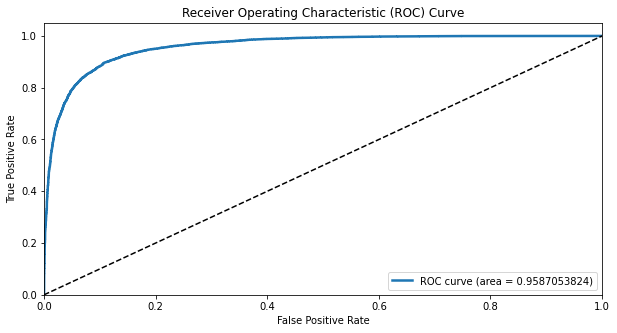

0.9587053824

In [58]:
# Create var with ROC curve
roc_auc = evaluation.plot_roc(model=ModelLG,y_test=y_test,features=X_test_values)
roc_auc

In [59]:
def check_roc(roc_auc):
    if roc_auc > 0.90:
        print('Success!')
    else:
        raise ValueError('Your model is not good enough!')
        
check_roc(roc_auc)

Success!


---
## 5. Feature Engineering with Custom Word Embedding



In [6]:
# Create tokenizer
tokenize = ToktokTokenizer()

# Create list empty
X_train_tok = []

# Iterate in X_train
for i in X_train:

    # Append text tokenized
    X_train_tok.append(tokenize.tokenize(i))

# Create list empty
X_test_tok = []

# Iterate in X_train
for i in X_test:

    # Append text tokenized
    X_test_tok.append(tokenize.tokenize(i))

In [7]:
# Create model
model_w2v =  Word2Vec(sentences=X_train_tok, window=5, min_count=1, workers=4,vector_size=100)

### Generate averaged word vector features



In [8]:
# Define fuction
def vectorizer(corpus, model):
    
    '''

    Corpus : X(train or test) tokenized 
    model : Word2vec

    '''
    
    # Create list empty
    corpus_vectors = []
    
    # Iterate corpus
    for review in corpus:

        # Variable with Add
        add = np.zeros(100)

        # Variable than count words 
        count = 0

        # Iterate review
        for word in review:
            
            # In the case than word exist
            try:

                # Add vectors
                add += model.wv[word]
                
                # count words
                count += 1
            
            # In the case than word no exist
            except:

                pass

        # Append Average
        corpus_vectors.append(add/count)
    
    return corpus_vectors

In [9]:
# Vectorizer Test
X_test_vec = vectorizer(X_test_tok,model=model_w2v)

# Vectorizer Train
X_train_vec = vectorizer(X_train_tok,model=model_w2v)

### *Don't change anything in this block, just make it run correctly*



In [34]:
def check_embedding(model):
    vector = model.wv['computer']
    if len(vector) == 100:
        print(
            'Success! Your embedding tells me that "women" and "man" '
            f'are similar with a score of {model.wv.similarity("woman", "man")}'
        )
    else:
        raise ValueError('You should check your embedding vector size!')
        
check_embedding(model_w2v)

Success! Your embedding tells me that "women" and "man" are similar with a score of 0.7320266962051392


In [12]:
def check_vectorizer(model):
    
    vector1 = model.wv['personal']
    vector2 = model.wv['computer']
    avg = vectorizer([['personal', 'computer']], model)[0]

    if np.allclose((vector1 + vector2) / 2, avg):
        print('Success!')
    else:
        raise ValueError('You should check your vectorizer!')
        
check_vectorizer(model_w2v)

Success!


### Modeling



In [50]:
# Create model Suport Vector Machine
SVCmodel = SVC(probability=True,C=50)

# Train model
SVCmodel.fit(X_train_vec,y_train)

# Predict
predictSVC =  SVCmodel.predict(X_test_vec)


In [51]:
# I do the evaluations
evaluation.get_performance(predictSVC,y_test)

Model Performance metrics:
------------------------------
Accuracy: 0.82092
Precision: 0.81984
Recall: 0.8216146877254871
F1 Score: 0.8207263844952548

Model Classification report:
------------------------------
              precision    recall  f1-score   support

           0       0.82      0.82      0.82     12527
           1       0.82      0.82      0.82     12473

    accuracy                           0.82     25000
   macro avg       0.82      0.82      0.82     25000
weighted avg       0.82      0.82      0.82     25000


Prediction Confusion Matrix:
------------------------------
       0      1
0  10275   2252
1   2225  10248


(0.82092, 0.81984, 0.8216146877254871, 0.8207263844952548)

### *Don't change anything in this block, just make it run correctly*

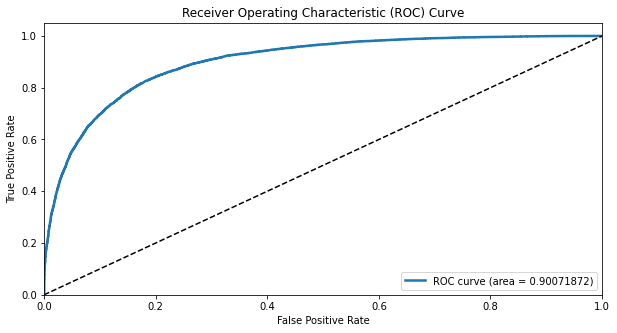

0.90071872

In [52]:
# Create variable with roc curve 
roc_auc = roc_auc = evaluation.plot_roc(model=SVCmodel,y_test=y_test,features=X_test_vec)

In [53]:
check_roc(roc_auc)

Success!
